# Import des bibliothèques


In [1]:
import pandas as pd
import plotly.express as px
import sys
sys.path.append('..')
from scripts.FeaturesExtraction import get_extracted_features

# Récupération du dataset avec les features

In [ ]:
df = get_extracted_features(10000)
df

table 1 / 4


KeyboardInterrupt: 

In [ ]:
df.to_csv("../data/all_data_for_10000_lines.csv", index=False)

# Reprendre ici

In [3]:
df = pd.read_csv('../data/all_data_for_10000_lines.csv')

# Analyse des notations

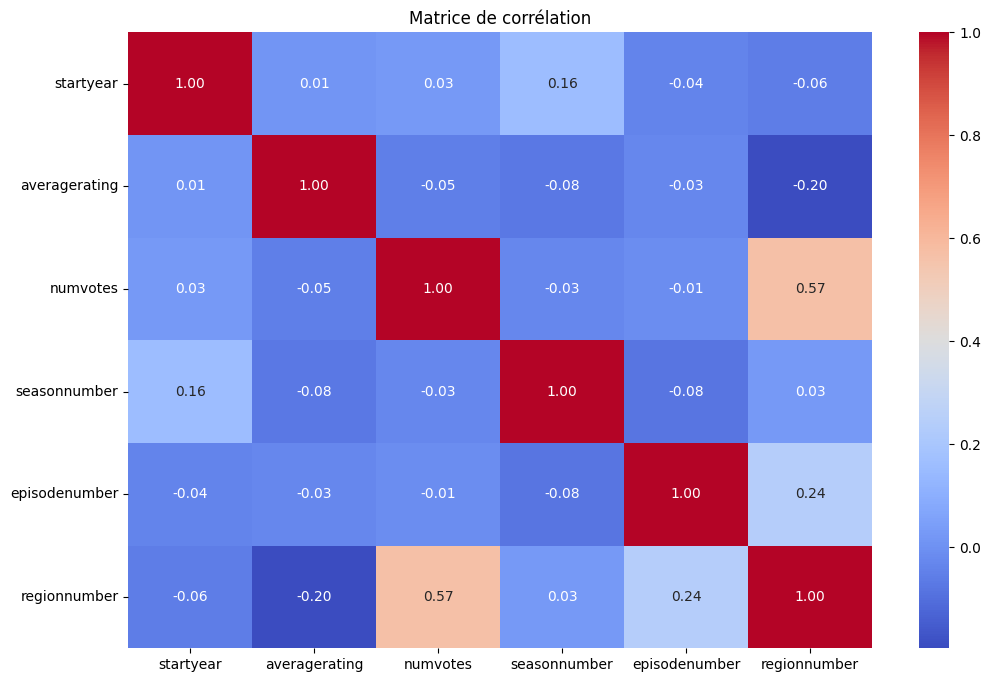

## agrégation numvotes et averagerating


On peux utiliser le score pondéré avec un minimum de votes (agrérgation utilisé par imdb pour le score). Cela permet de tenir compte du nombre du vote dans le score et que les films avec moins de votes soient moins pénalisés dans leur score.


In [8]:
# Paramètres pour le calcul du score pondéré
C = df['averagerating'].mean()  # Score moyen de tous les films
m = 1000  # Nombre minimum de votes requis pour être pris en compte

# Calcul du score pondéré
def weighted_rating(x, m=m, C=C):
    v = x['numvotes']
    R = x['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

df['weighted_score'] = df.apply(weighted_rating, axis=1)
df

,tconst,titletype,primarytitle,isadult,startyear,genres,averagerating,numvotes,seasonnumber,episodenumber,regionnumber,regionlist,actor,self,producer,actress,director,weighted_score
0,tt12605172,tvEpisode,Episode #1.2,False,2020.0,"Action,Mystery",NaN,NaN,1.0,2.0,8,"['PT', 'IN', 'FR', 'IT', 'DE', 'JP', '\\N', 'ES']","['Ryoma Takeuchi', 'Kôtarô Yoshida', 'Hayato I...",[],[],['Mikako Tabe'],['Eiichirô Hasumi'],NaN
1,tt12605176,tvSpecial,Shaheb Bibi Golam,False,2016.0,Drama,NaN,NaN,NaN,NaN,2,"['\\N', 'BD']","['Omer Ayaz Ony', 'Fs Nayeem']",[],['Hasan Al Mamun Ponir'],['Aparna Ghosh'],['Mir Asaduzzaman Ariyan'],NaN
2,tt12605178,short,Girl in the Mirror,False,2020.0,"Music,Short",NaN,NaN,NaN,NaN,2,"['\\N', 'US']",[],[],['Greg L. Hines'],['Vernae Taylor'],['Greg L. Hines'],NaN
3,tt1260518,tvEpisode,Loose Ends,False,2008.0,Drama,NaN,NaN,18.0,5.0,1,['\\N'],"['Paul Akl', 'Michael Apgar', 'Alex De Leon', ...",[],[],"['Amanda Garant', 'Angelica Allen', 'Leah Garv...","['Tessa Olson', 'Jenn Carroll']",NaN
4,tt12605180,tvEpisode,Episode #1.3,False,2020.0,"Action,Mystery",NaN,NaN,1.0,3.0,8,"['\\N', 'PT', 'IN', 'FR', 'IT', 'DE', 'JP', 'ES']","['Ryoma Takeuchi', 'Kôtarô Yoshida', 'Tatsuya ...",[],[],['Mikako Tabe'],['Eiichirô Hasumi'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,tt12624184,tvEpisode,Canción de cuna,False,2001.0,"Crime,Drama,Thriller",NaN,NaN,NaN,NaN,2,"['\\N', 'MX']","['Roberto Sen', 'Sebastián Rulli', 'Hugo Denis']",[],[],['Tiaré Scanda'],"['Felipe Nájera', 'Francisco Franco Alba']",NaN
9996,tt12624186,videoGame,Go Diego Go! Great Dinosaur Rescue,False,2008.0,Adventure,5.3,7.0,NaN,NaN,2,"['\\N', 'US']","['Keeler Sandhaus', 'Keeler Sandhaus', 'Keeler...",[],[],"['Katie McWane', 'Katie McWane', 'Michelle Con...",[],6.945251
9997,tt1262419,movie,Sanpei the Fisher Boy,False,2009.0,Drama,6.1,109.0,NaN,NaN,5,"['\\N', 'XWW', 'BR', 'JP', 'CN']","['Kenta Suga', 'Masato Hagiwara', 'Ryûji Katag...",[],['Masatake Kondô'],"['Yû Kashii', 'Cynthia Cheston']",['Yôjirô Takita'],6.872558
9998,tt12624194,movie,Debbie's Time,True,1971.0,Adult,NaN,NaN,NaN,NaN,2,"['\\N', 'US']",[],[],['Sven Peters'],[],['Sven Peters'],NaN


In [5]:
df["weighted_score"].describe()

count    1027.000000
mean        6.926801
std         0.326370
min         4.405601
25%         6.943240
50%         6.959651
75%         6.974027
max         8.683838
Name: weighted_score, dtype: float64

## Représentation de la notation


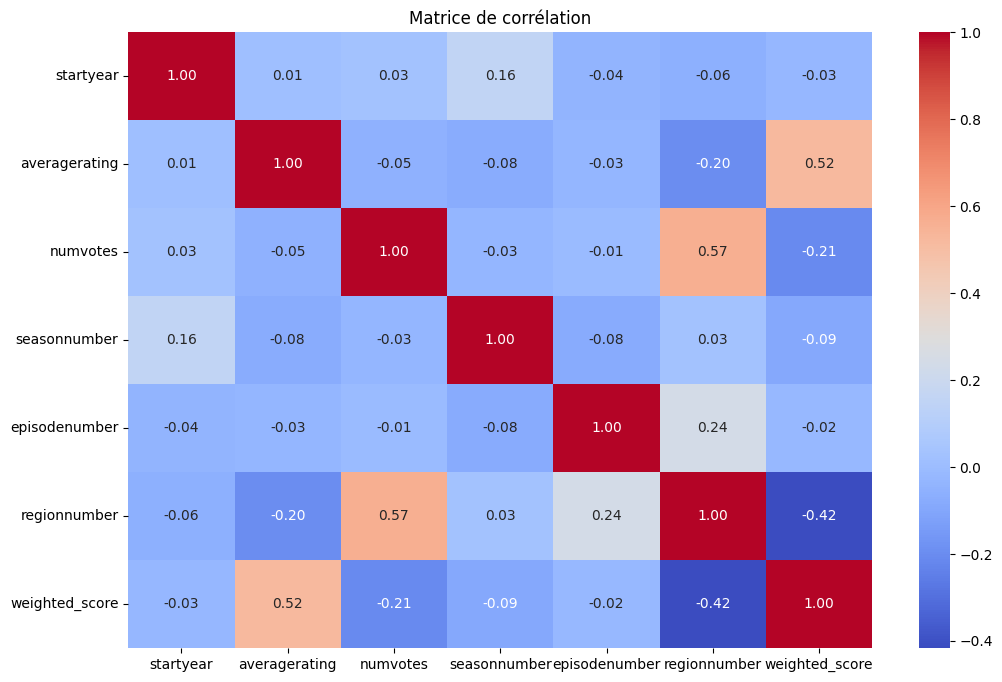

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
# Enlever les colonnes non numériques
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [6]:
px.histogram(df, x='weighted_score', title='Nombre de votes en fonction du score pondéré', nbins=500)

## titletype et notation


In [7]:

px.violin(df, x='titletype', y='weighted_score', 
                labels={'titletype': 'Title Type', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Title Type', box=True, points="all")

## isadult et notation


In [8]:
px.violin(df, x='isadult', y='weighted_score', 
                title='Distribution of Weighted Scores by adult or not', box=True, points="all")

## startyear et notation


In [10]:
mean_weighted_score_by_year = df.groupby('startyear')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_year, x='startyear', y='weighted_score', 
              labels={'startyear': 'Start Year', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Start Year')

## endyear et notation


In [12]:
mean_weighted_score_by_year = df.groupby('endyear')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_year, x='endyear', y='weighted_score', 
              labels={'endyear': 'Endyear Year', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by End Year')

## runtimeminutes et notation


In [16]:
mean_weighted_score_by_runtimeminutes = df.groupby('runtimeminutes')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_runtimeminutes, x='runtimeminutes', y='weighted_score', 
              labels={'runtimeminutes': 'Duration', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Duration')

## genres et notation


In [20]:
df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
px.violin(df_exploded, x='genres', y='weighted_score', 
                labels={'genres': 'Genre', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Genre', box=True, points="all")

# episodenumber et notation


In [26]:
mean_weighted_score_by_episodenumber = df.groupby('episodenumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_episodenumber, x='episodenumber', y='weighted_score', 
              labels={'episodenumber': 'Episode number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Episode number',
              range_x=[0, 200])

# seasonnumber et notation


In [28]:
mean_weighted_score_by_seasonnumber = df.groupby('seasonnumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_seasonnumber, x='seasonnumber', y='weighted_score', 
              labels={'seasonnumber': 'Season number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Season number',
              range_x=[0, 50])

### regionnumber et notation


In [29]:
mean_weighted_score_by_regionnumber = df.groupby('regionnumber')['weighted_score'].mean().reset_index()
px.line(mean_weighted_score_by_regionnumber, x='regionnumber', y='weighted_score', 
              labels={'regionnumber': 'Region number', 'weighted_score': 'Average Weighted Score'},
              title='Average Weighted Score by Region number')

# regionlist et notation


In [38]:
def clean_regionlist(region_list_str):
    region_list_str = region_list_str.strip("[]").replace("'", "")
    region_list = region_list_str.split(", ")
    return [region for region in region_list if region != '\\N']

df['regionlist'] = df['regionlist'].apply(clean_regionlist)



AttributeError: 'list' object has no attribute 'strip'

In [39]:
df_exploded = df.explode('regionlist')
mean_weighted_score_by_region = df_exploded.groupby('regionlist')['weighted_score'].mean().reset_index()
px.violin(df_exploded, x='regionlist', y='weighted_score', 
                labels={'regionlist': 'Region', 'weighted_score': 'Weighted Score'},
                title='Distribution of Weighted Scores by Region', box=True)